In [1]:
import NN_Module as nnm
import torch
import polynomial as poly
import numpy as np
import numpy.ma as ma
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
from pandas import read_csv
import argparse
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
#This function runs the graphing of the data
def graphModelDifference(residual_data_difference, title):
    graph = plt.subplots()
    average = np.array([])
    names = np.array([])
    distance = np.linspace(0,32,16) 
    for key in residual_data_difference:
        average = np.append(average,np.mean(residual_data_difference[key]))
        names = np.append(names,key)
    graph[1].bar(distance, average, width = 1)
    graph[1].set_xticks(distance)
    graph[1].set_xticklabels(names, rotation=65)
    graph[1].set_title(title)
    graph[1].set_ylabel(f'({model1} residual) - ({model2} residual)')
    pp.savefig(graph[0])
    graph[0].tight_layout()

In [45]:
#Get which models to compare
model1 = '12957_1'
model2 = '12957_15'

In [46]:
#Makes a dic of the WC for easy looping.
names = {}
names['cQei'] = 0
names['cQl3i'] = 1
names['cQlMi'] = 2
names['cbW'] = 3
names['cpQ3'] = 4
names['cpQM'] = 5
names['cpt'] = 6
names['cptb'] = 7
names['ctG'] = 8
names['ctW'] = 9
names['ctZ'] = 10
names['ctei'] = 11
names['ctlSi'] = 12
names['ctlTi'] = 13
names['ctli'] = 14
names['ctp'] = 15

In [47]:
#Loads the necessary residual data from the graphs
saved_graphs_model1 = torch.load(f'./graphs/{model1}_validation_graphs.npz')
residual_data_frozen_model1 = saved_graphs_model1['diff_graph_data']
residual_data_profiled_model1 = saved_graphs_model1['diff_graph_data_profiled']
residual_zoomed_frozen_model1 = saved_graphs_model1['diff_graph_data_zoomed']
residual_zoomed_profiled_model1 = saved_graphs_model1['diff_graph_data_zoomed_profiled']

saved_graphs_model2 = torch.load(f'./graphs/{model2}_validation_graphs.npz')
residual_data_frozen_model2 = saved_graphs_model2['diff_graph_data']
residual_data_profiled_model2 = saved_graphs_model2['diff_graph_data_profiled']
residual_zoomed_frozen_model2 = saved_graphs_model2['diff_graph_data_zoomed']
residual_zoomed_profiled_model2 = saved_graphs_model2['diff_graph_data_zoomed_profiled']

In [48]:
#These are dics to store the data for the comparison graphs
model_difference = {}
model_difference_zoomed = {}
model_difference_profiled = {}
model_difference_frozen_zoomed = {}
model_difference_profiled_zoomed = {}
model_difference_std = {}
model_difference_std_profiled = {}
model_std = {}
model_std_profiled = {}

In [49]:
#This generates the data for the comparison graphs
for key in names:
    model_difference[key] = (np.absolute(residual_data_frozen_model1[key]['deltaNLL']) - np.absolute(residual_data_frozen_model2[key]['deltaNLL']))
    model_difference_profiled[key] = (np.absolute(residual_data_profiled_model1[key]['deltaNLL']) - np.absolute(residual_data_profiled_model2[key]['deltaNLL']))
    model_difference_frozen_zoomed[key] = (np.absolute(residual_zoomed_frozen_model1[key]['deltaNLL']) - np.absolute(residual_zoomed_frozen_model2[key]['deltaNLL']))
    model_difference_profiled_zoomed[key] = (np.absolute(residual_zoomed_profiled_model1[key]['deltaNLL']) - np.absolute(residual_zoomed_profiled_model2[key]['deltaNLL']))
    model_difference_std[key] = np.std(model_difference[key])
    model_difference_std_profiled[key] = np.std(model_difference_profiled[key])
    model_std[key] = model_difference[key][np.abs(model_difference[key]) <= 2*model_difference_std[key]]
    model_std_profiled[key] = model_difference_profiled[key][np.abs(model_difference_profiled[key]) <= 2*model_difference_std_profiled[key]]

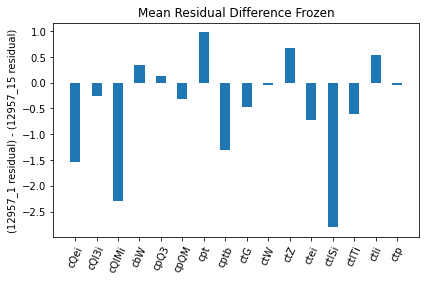

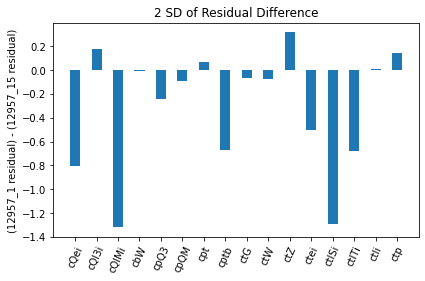

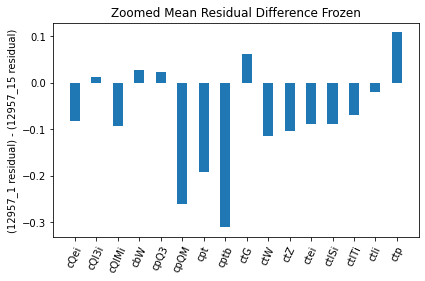

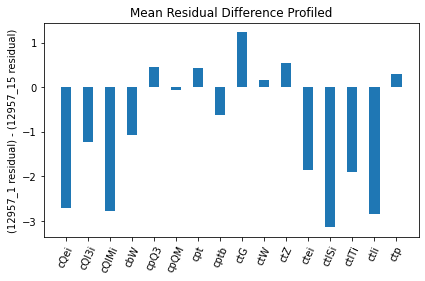

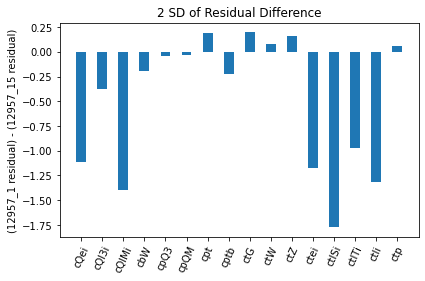

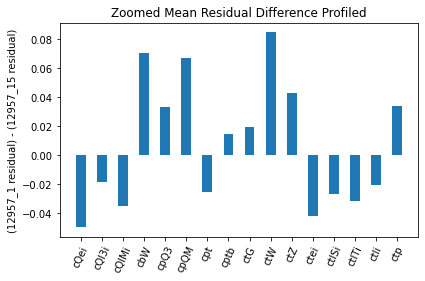

In [50]:
#This graphs the data and saves it as a pdf
pp = PdfPages(f'{model1} vs. {model2}.pdf')
graphModelDifference(model_difference, 'Mean Residual Difference Frozen')
graphModelDifference(model_std, '2 SD of Residual Difference')
graphModelDifference(model_difference_frozen_zoomed, 'Zoomed Mean Residual Difference Frozen')
graphModelDifference(model_difference_profiled, 'Mean Residual Difference Profiled')
graphModelDifference(model_std_profiled, '2 SD of Residual Difference')
graphModelDifference(model_difference_profiled_zoomed, 'Zoomed Mean Residual Difference Profiled')
pp.close()